# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import urllib.robotparser
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# exploraremos el ranking global de artistas en kworb
url = 'https://kworb.net/itunes/'

In [3]:
# verificamos si podemos hacer web scrapping en el url
robot = f"{url}/robots.txt"
res = urllib.robotparser.RobotFileParser()
res.set_url(robot)
res.read()

scrap = res.can_fetch("*", robot)

print(f"¿podemos scrapear?: {'si' if scrap else 'no'}")

¿podemos scrapear?: si


In [4]:
# cabecera para simular que el acceso viene de un navegador
headers = {"User-Agent": "Mozilla/5.0 (Web Scraping Bot)"}

# request get para ver si es exitoso
respuesta = requests.get(url, headers=headers)
respuesta

<Response [200]>

In [5]:
# request post para ver si podriamos publicar
sol = requests.post(url, headers=headers)
sol

<Response [200]>

In [6]:
# analizamos el html
sopa = BeautifulSoup(respuesta.text,'html.parser')

In [7]:
# buscamos una tabla
tabla = sopa.find('table')
if tabla is None:
    print("No hay tablas en la página")

In [8]:
# los encabezados de una tabla en html están dentro de la etiqueta thead separador th
encabezados = [th.get_text(strip=True) for th in tabla.find('thead').find_all('th')]
encabezados

['Pos',
 'P+',
 'Artist',
 'Points',
 'Apple M',
 'Spotify',
 'iTunes',
 'YouTube',
 'Shazam',
 'Deezer',
 'Top Country',
 '#']

In [9]:
datos = []

# en html las filas de una tabla están dentro de las etiquetas tr
# dentro del tbody de la tabla
filas = tabla.find("tbody").find_all('tr')

In [10]:
filas

[<tr><td>1</td><td>+1</td><td class="bl mp text"><div><a href="artist/badbunny.html">Bad Bunny</a></div></td><td><b>4085</b></td><td class="bl smaller">1898</td><td class="smaller">1778</td><td class="smaller">53</td><td class="smaller">123</td><td class="smaller">53</td><td class="smaller">179</td><td class="bl mp smaller"><div>Spain</div></td><td class="smaller">79</td></tr>,
 <tr><td>2</td><td>+1</td><td class="bl mp text"><div><a href="artist/kpopdemonhunterscast.html">KPop Demon Hunters Cast</a></div></td><td><b>3877</b></td><td class="bl smaller">2166</td><td class="smaller">764</td><td class="smaller">824</td><td class="smaller">0</td><td class="smaller">122</td><td class="smaller">0</td><td class="bl mp smaller"><div>Australia</div></td><td class="smaller">139</td></tr>,
 <tr><td>3</td><td>+1</td><td class="bl mp text"><div><a href="artist/justinbieber.html">Justin Bieber</a></div></td><td><b>3584</b></td><td class="bl smaller">1862</td><td class="smaller">1312</td><td class="s

In [11]:
# ahora extraemos cada dato dentro de td
for fila in filas:
    celdas = []
    for celda in fila.find_all('td'):
        celdas.append(celda.text.strip().replace("\n", " "))
    datos.append(celdas)

datos

[['1',
  '+1',
  'Bad Bunny',
  '4085',
  '1898',
  '1778',
  '53',
  '123',
  '53',
  '179',
  'Spain',
  '79'],
 ['2',
  '+1',
  'KPop Demon Hunters Cast',
  '3877',
  '2166',
  '764',
  '824',
  '0',
  '122',
  '0',
  'Australia',
  '139'],
 ['3',
  '+1',
  'Justin Bieber',
  '3584',
  '1862',
  '1312',
  '239',
  '82',
  '48',
  '40',
  'Canada',
  '153'],
 ['4',
  'NEW',
  'Ozzy Osbourne',
  '3534',
  '1242',
  '151',
  '2062',
  '0',
  '10',
  '69',
  'United States',
  '95'],
 ['5',
  '-4',
  'Tyler, The Creator',
  '3363',
  '2019',
  '1102',
  '165',
  '22',
  '0',
  '55',
  'United States',
  '146'],
 ['6',
  'NEW',
  'Black Sabbath',
  '2919',
  '1419',
  '107',
  '1350',
  '5',
  '5',
  '32',
  'Australia',
  '97'],
 ['7',
  '-2',
  'Alex Warren',
  '2867',
  '924',
  '988',
  '401',
  '230',
  '160',
  '164',
  'Australia',
  '139'],
 ['8',
  '-2',
  'BeÃ©le',
  '2739',
  '825',
  '1105',
  '54',
  '623',
  '131',
  '0',
  'Spain',
  '36'],
 ['9',
  '-2',
  'Saja Boys',
  

In [12]:
df = pd.DataFrame(datos,columns=encabezados)
df

,Pos,P+,Artist,Points,Apple M,Spotify,iTunes,YouTube,Shazam,Deezer,Top Country,#
0,1,+1,Bad Bunny,4085,1898,1778,53,123,53,179,Spain,79
1,2,+1,KPop Demon Hunters Cast,3877,2166,764,824,0,122,0,Australia,139
2,3,+1,Justin Bieber,3584,1862,1312,239,82,48,40,Canada,153
3,4,NEW,Ozzy Osbourne,3534,1242,151,2062,0,10,69,United States,95
4,5,-4,"Tyler, The Creator",3363,2019,1102,165,22,0,55,United States,146
...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,-,Baby Lullaby Academy,170,168,0,2,0,0,0,Australia,46
296,297,NEW,Ãscar Maydon,170,85,0,7,64,6,8,Mexico,11
297,298,+,Diego,170,33,100,4,25,2,6,Brazil,1
298,299,-,AC/DC,170,34,35,86,3,0,11,Australia,47


In [13]:
import sqlite3

# crear una base de datros
conn = sqlite3.connect('global_top_artists.db')
cursor = conn.cursor()

# create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS global_top_artists (
    position INTEGER,
    growth TEXT,
    artist TEXT,
    points INTEGER,
    apple INTEGER,
    spotify INTEGER,
    itunes INTEGER,
    youtube INTEGER, 
    shazam INTEGER, 
    deezer INTEGER,
    top_country TEXT, 
    top_number INTEGER
)
''')

# insertar valores
df.to_sql('global_top_artists', conn, if_exists='replace', index=False)

# commit
conn.commit()

# cierra la conexion
conn.close()

print("Base de datos 'global_top_artists.db' creada y llenada exitosamente.")

Base de datos 'global_top_artists.db' creada y llenada exitosamente.


In [14]:
df.dtypes

Pos            object
P+             object
Artist         object
Points         object
Apple M        object
Spotify        object
iTunes         object
YouTube        object
Shazam         object
Deezer         object
Top Country    object
#              object
dtype: object

In [15]:
# convertir columnas numericas a numericos
columnas = ['Pos','Points','Apple M','Spotify','iTunes','YouTube','Shazam','Deezer', '#']
for columna in columnas:
    df[columna] = df[columna].astype(str).astype(int)

In [16]:
df.dtypes

Pos             int64
P+             object
Artist         object
Points          int64
Apple M         int64
Spotify         int64
iTunes          int64
YouTube         int64
Shazam          int64
Deezer          int64
Top Country    object
#               int64
dtype: object

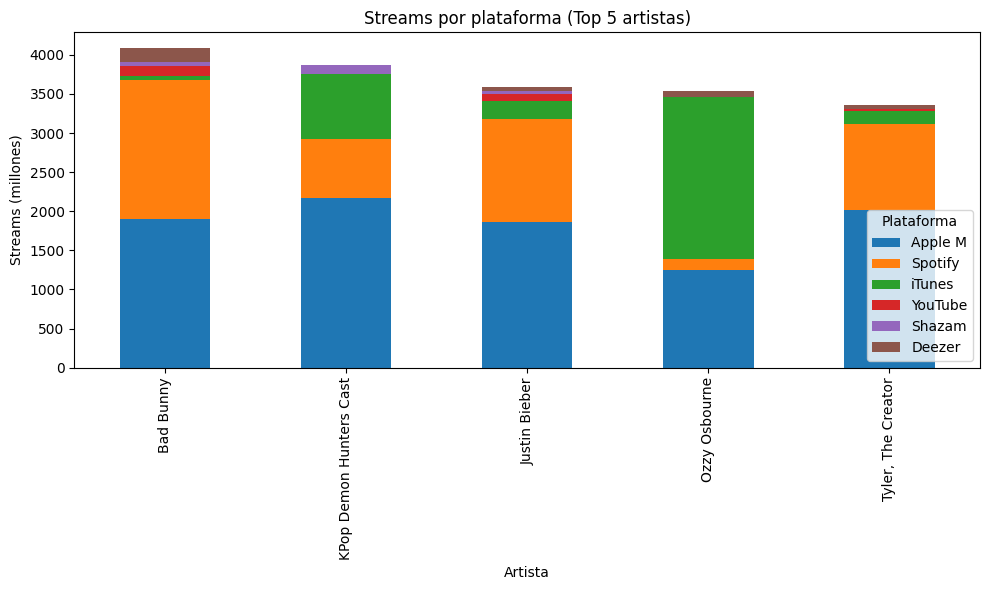

In [18]:
import matplotlib.pyplot as plt

# Top 5 artistas por puntos
top_artistas = df.sort_values(by='Points', ascending=False).head(5)

# Plataformas en millones
plataformas = ['Apple M', 'Spotify', 'iTunes', 'YouTube', 'Shazam', 'Deezer']

# Gráfico apilado
top_artistas.set_index('Artist')[plataformas].plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Streams por plataforma (Top 5 artistas)')
plt.ylabel('Streams (millones)')
plt.xlabel('Artista')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

In [22]:
import seaborn as sns

# agrupar por pais y sumar reproducciones
heatmap_data = df.groupby('Top Country')[plataformas].sum()
heatmap_data['total_streams'] = heatmap_data.select_dtypes(include='number').sum(axis=1)

In [23]:
heatmap_data

,Apple M,Spotify,iTunes,YouTube,Shazam,Deezer,total_streams
Top Country,,,,,,,
Antigua and Barbuda,384,0,6,42,0,0,432
Argentina,165,667,22,95,21,29,999
Australia,14076,7980,6769,629,1222,808,31484
Austria,24,41,52,59,17,7,200
Belarus,276,338,19,19,2,98,752
...,...,...,...,...,...,...,...
Trinidad and Tobago,207,0,4,29,0,2,242
Turkey,514,689,174,301,49,12,1739
United Kingdom,1274,1217,828,446,433,312,4510


In [28]:
top_countries = heatmap_data.sort_values(by='total_streams', ascending = False).head(10)
top_countries_list = top_countries.loc[:,plataformas]
top_countries_list

,Apple M,Spotify,iTunes,YouTube,Shazam,Deezer
Top Country,,,,,,
Australia,14076,7980,6769,629,1222,808
United States,12381,4636,3033,1514,197,612
Spain,5244,6555,254,1531,485,333
Canada,4302,4153,897,247,290,352
South Africa,4502,683,434,278,349,155
Germany,1504,2866,521,288,821,107
France,2912,1611,171,595,174,291
Mexico,1771,2155,158,1087,106,141
United Kingdom,1274,1217,828,446,433,312


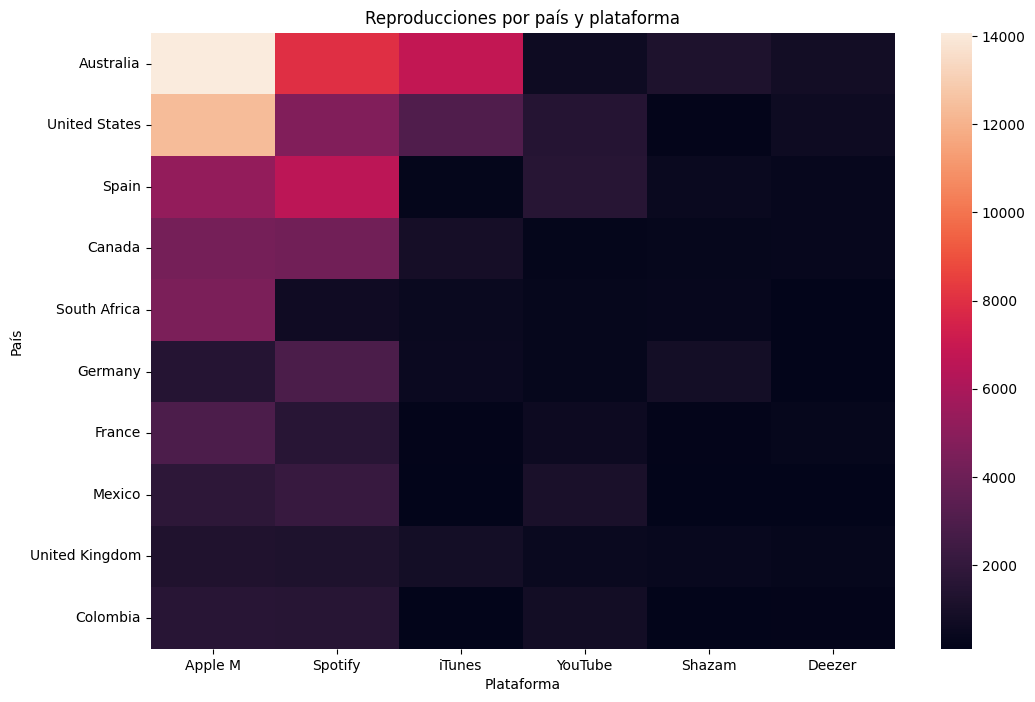

In [29]:
# reproducciones por país y plataforma
plt.figure(figsize=(12,8))
sns.heatmap(top_countries_list)
plt.title('Reproducciones por país y plataforma')
plt.xlabel('Plataforma')
plt.ylabel('País')
plt.show()

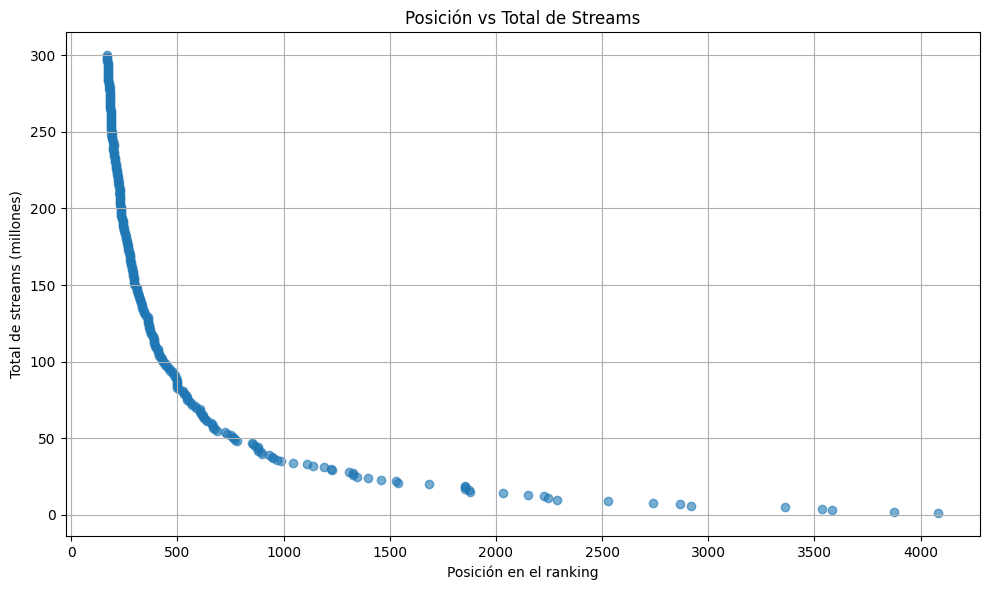

In [31]:
# total de streams
df['Total Streams'] = df[plataformas].sum(axis=1)

plt.figure(figsize=(10,6))
plt.scatter(df['Total Streams'],df['Pos'], alpha=0.6)

plt.title('Posición vs Total de Streams')
plt.xlabel('Posición en el ranking')
plt.ylabel('Total de streams (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()
